<a href="https://colab.research.google.com/github/cpappas18/articulaite/blob/main/k_NN_Classification_(4_datasets_median_remove).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from os import system
from collections import Counter
from smote import smote_multiclass
from numpy import where, random

In [18]:
data = pd.read_csv('all_disorders_median_std.csv')
data=data.drop(['Unnamed: 0'],axis=1)
data2=pd.read_csv('all_disorders_remove_std.csv')
data2=data2.drop(['Unnamed: 0'],axis=1)

x = data.drop("Status",axis=1)
y = data["Status"]

X=data2.drop("Status",axis=1)
Y=data2["Status"]

In [19]:
'''Splitting Data for median dataset to get stratified testing set'''
# Splitting Data into 70% Training data and 30% Testing Data:
X_Train, X_Test, y_Train,  y_Test = train_test_split(x, y,train_size=0.7, test_size=0.3, random_state=42,stratify=y)
'''Splitting Data for remove dataset'''
# Splitting Data into 70% Training data and 30% Testing Data:
X_Train2, X_Test2, y_Train2,  y_Test2 = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=42,stratify=Y)

In [20]:
#Making testing set
testing=pd.concat([y_Test,X_Test], axis=1)
testing2=pd.concat([y_Test2,X_Test2], axis=1)

#creating the x-test and y-test
#Median dataset
X_test=testing.drop("Status",axis=1)
y_test=testing["Status"]
#Remove dataset
X_test2=testing2.drop("Status",axis=1)
y_test2=testing2["Status"]

In [21]:
'''Splitting Data for median dataset for unstratified training set'''
# Splitting Data into 70% Training data and 30% Testing Data:
X_train, X_TEST, y_train,  y_TEST = train_test_split(x, y,train_size=0.7, test_size=0.3, random_state=42)

'''Splitting Data for remove dataset'''
# Splitting Data into 70% Training data and 30% Testing Data:
X_train2, X_TEST2, y_train2,  y_TEST2 = train_test_split(X, Y,train_size=0.7, test_size=0.3, random_state=42)

In [28]:
#Applying smote to the training data to standardize trianing
training=pd.concat([y_train,X_train], axis=1)
training2=pd.concat([y_train2,X_train2], axis=1)
training= smote_multiclass(training, num_samples_dict={0: 4500, 1: 4500, 2: 4500, 3:4500},one_hot_encoded=False)
training2= smote_multiclass(training2, num_samples_dict={0: 4500, 1: 4500, 2: 4500, 3:4500},one_hot_encoded=False)
#Reassigning labels
#Median Dataset
X_train=training.drop("Status",axis=1)
y_train = training["Status"]
#Remove Dataset
X_train2=training2.drop("Status",axis=1)
y_train2 = training2["Status"]

# K-Nearest Neighbor Classification

In [29]:
'''k-NN for Median Dataset'''
#k-NN
from sklearn.neighbors import KNeighborsClassifier
#To use the build in multilabel adabtor use:
#from skmultilearn.adapt import MLkNN
#knn_model= MLkNN(k=20)

#fiting training data on model
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn_model = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn_model.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn_model.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn_model.score(X_test, y_test) 
    print(f"Train Accuracy:")
    print(train_accuracy[i])
    print(f"Test Accuracy:")
    print(test_accuracy[i])

#Getting Average Accuracy Score
from statistics import mean
def Average(l): 
    avg = mean(l) 
    return avg 
average_score_train=Average(train_accuracy)
average_score_test=Average(test_accuracy)

#prediction using K-NN
y_pred = knn_model.predict(X_test)
print(f"The predictions for the data is {y_pred}")

#Looking at accuracy by counting the number of misclassified cases
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples in KNN: {}'.format(count_misclassified))

#Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse1 = sqrt(mse)
print(f"Mean square error for training data is {rmse1}")

#evaluating the predictive performance of our model
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse2 = sqrt(mse)
print(f"Mean square error for test data is {rmse2}")

Train Accuracy:
1.0
Test Accuracy:
0.9630149812734082
Train Accuracy:
0.9882777777777778
Test Accuracy:
0.9232209737827716
Train Accuracy:
0.9897777777777778
Test Accuracy:
0.9349250936329588
Train Accuracy:
0.9825
Test Accuracy:
0.9115168539325843
Train Accuracy:
0.9842777777777778
Test Accuracy:
0.9232209737827716
Train Accuracy:
0.9777777777777777
Test Accuracy:
0.898876404494382
Train Accuracy:
0.979
Test Accuracy:
0.9096441947565543
Train Accuracy:
0.9727222222222223
Test Accuracy:
0.8885767790262172
The predictions for the data is [1 1 1 ... 1 1 1]
Misclassified samples in KNN: 238
Mean square error for training data is 0.17826322609494585
Mean square error for test data is 0.3338011698208722


In [30]:
'''k-NN for Remove Dataset'''
#k-NN
from sklearn.neighbors import KNeighborsClassifier
#To use the build in multilabel adabtor use:
#from skmultilearn.adapt import MLkNN
#knn_model= MLkNN(k=20)

#fiting training data on model
#Setup arrays to store training and test accuracies
neighbors2 = np.arange(1,9)
train_accuracy2 =np.empty(len(neighbors2))
test_accuracy2 = np.empty(len(neighbors2))

for i,K in enumerate(neighbors2):
    #Setup a knn classifier with k neighbors
    knn_model2 = KNeighborsClassifier(n_neighbors=K)
    
    #Fit the model
    knn_model2.fit(X_train2, y_train2)
    
    #Compute accuracy on the training set
    train_accuracy2[i] = knn_model2.score(X_train2, y_train2)
    
    #Compute accuracy on the test set
    test_accuracy2[i] = knn_model2.score(X_test2, y_test2) 
    print(f"Train Accuracy:")
    print(train_accuracy2[i])
    print(f"Test Accuracy:")
    print(test_accuracy2[i])

#Getting Average Accuracy Score
average_score_train2=Average(train_accuracy2)
average_score_test2=Average(test_accuracy2)

#prediction using K-NN
y_pred2 = knn_model2.predict(X_test2)
print(f"The predictions for the data is {y_pred2}")

#Looking at accuracy by counting the number of misclassified cases
count_misclassified2 = (y_test2 != y_pred2).sum()
print('Misclassified samples in KNN: {}'.format(count_misclassified2))

#Mean Square Error
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds2 = knn_model2.predict(X_train2)
mse2 = mean_squared_error(y_train2, train_preds2)
rmse_a = sqrt(mse2)
print(f"Mean square error for training data is {rmse_a}")

#evaluating the predictive performance of our model
test_preds2 = knn_model2.predict(X_test2)
mse2 = mean_squared_error(y_test2, test_preds2)
rmse_b = sqrt(mse2)
print(f"Mean square error for test data is {rmse_b}")

Train Accuracy:
1.0
Test Accuracy:
0.9830508474576272
Train Accuracy:
0.9887777777777778
Test Accuracy:
0.9451645064805583
Train Accuracy:
0.9897222222222222
Test Accuracy:
0.9536390827517448
Train Accuracy:
0.9818888888888889
Test Accuracy:
0.9302093718843469
Train Accuracy:
0.983
Test Accuracy:
0.9371884346959123
Train Accuracy:
0.9781111111111112
Test Accuracy:
0.9227318045862413
Train Accuracy:
0.9788333333333333
Test Accuracy:
0.9277168494516451
Train Accuracy:
0.9742777777777778
Test Accuracy:
0.9127617148554337
The predictions for the data is [1 1 0 ... 1 1 1]
Misclassified samples in KNN: 175
Mean square error for training data is 0.16414763002993507
Mean square error for test data is 0.29788218913554976


# Parameter Tuning & Model Evaluation

In [31]:
'''K prediction for Median Dataset'''

#Predicting the best value of k 
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 20)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)

#using .best_params_ to find the best performing k
print(f"The best value for k is {gridsearch.best_params_}")

#Seeing how this predicted k affects the training and testing performances
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

print(f"Mean square error for test data is {test_rmse}")

The best value for k is {'n_neighbors': 1}
Mean square error for test data is 0.19231489470811083


In [32]:
'''K prediction for Remove Dataset'''

#Predicting the best value of k 
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 20)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train2, y_train2)

#using .best_params_ to find the best performing k
print(f"The best value for k is {gridsearch.best_params_}")

#Seeing how this predicted k affects the training and testing performances
train_preds_grid2 = gridsearch.predict(X_train2)
train_mse2 = mean_squared_error(y_train2, train_preds_grid2)
train_rmse2 = sqrt(train_mse2)
test_preds_grid2 = gridsearch.predict(X_test2)
test_mse2 = mean_squared_error(y_test2, test_preds_grid2)
test_rmse2 = sqrt(test_mse2)
train_rmse2

print(f"Mean square error for test data is {test_rmse2}")

The best value for k is {'n_neighbors': 1}
Mean square error for test data is 0.1358111409347334


Text(0, 0.5, 'Mean Error')

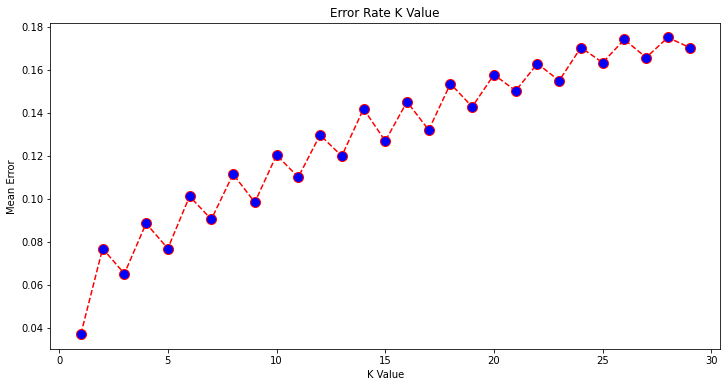

In [33]:
error = []

# Calculating error for K values between 1 and 40 for MEDIAN DATASET
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
# plot the error values against K values using the elbow graph method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Mean Error')

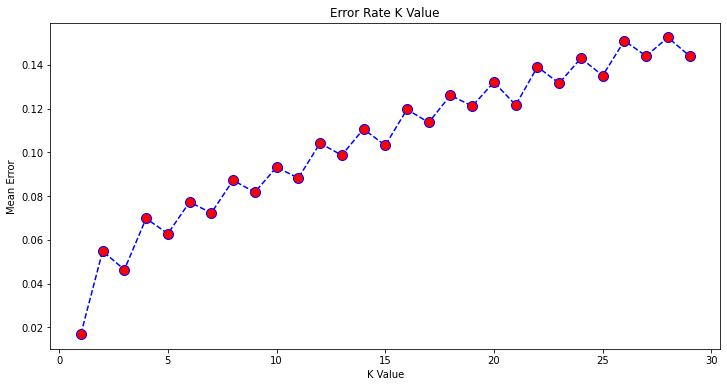

In [34]:
error2 = []

# Calculating error for K values between 1 and 30 for REMOVE DATASET
for i in range(1, 30):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X_train2, y_train2)
    pred2_i = knn2.predict(X_test2)
    error2.append(np.mean(pred2_i != y_test2))
    
# plot the error values against K values using the elbow graph method
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error2, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

                precision    recall  f1-score   support

       Control       0.32      0.93      0.48       116
    Parkinsons       1.00      0.89      0.94      2012
           ALS       1.00      1.00      1.00         4
Cerebral Palsy       1.00      1.00      1.00         4

      accuracy                           0.89      2136
     macro avg       0.83      0.95      0.85      2136
  weighted avg       0.96      0.89      0.91      2136



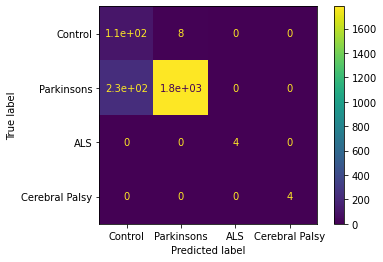

In [35]:
'''Confusion Matrix for Remove Dataset'''
#Evaluating the Algorithm using a confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
y_pred = knn_model.predict(X_test)
target_names = ['Control', 'Parkinsons', 'ALS','Cerebral Palsy']
Classification_rep=classification_report(y_test, y_pred,target_names=target_names)
print(Classification_rep)

#Plotting Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model, X_test, y_test, display_labels=['Control', 'Parkinsons', 'ALS', 'Cerebral Palsy'])  
plt.show() 

                precision    recall  f1-score   support

       Control       0.26      0.92      0.41        65
    Parkinsons       1.00      0.91      0.95      1932
           ALS       0.83      1.00      0.91         5
Cerebral Palsy       1.00      1.00      1.00         4

      accuracy                           0.91      2006
     macro avg       0.77      0.96      0.82      2006
  weighted avg       0.97      0.91      0.94      2006



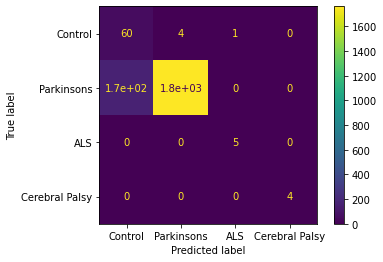

In [36]:
'''Confusion Matrix for Remove Dataset'''
#Evaluating the Algorithm using a confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
y_pred2 = knn_model2.predict(X_test2)
Classification_rep2=classification_report(y_test2, y_pred2,target_names=target_names)
print(Classification_rep2)

#Plotting Confusion Matrix for Test set
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model2, X_test2, y_test2, display_labels=['Control', 'Parkinsons', 'ALS', 'Cerebral Palsy'])  
plt.show() 



In [37]:
'''Median Dataset Loglos'''
#Loglos Evaluation
from sklearn import model_selection
# log loss (closer to 0 is better)
for k in range(2,6,4):
  kfold = model_selection.KFold(n_splits=k, shuffle=True)
  results = model_selection.cross_val_score(knn_model, x, y, cv=kfold, scoring='neg_log_loss')
  print("Logloss: %.3f (%.f)" % (results.mean(), k))

Logloss: -0.626 (2)


In [38]:
'''Remove Dataset Loglos'''
#Loglos Evaluation
from sklearn import model_selection
# log loss (closer to 0 is better)
for k in range(2,6,4):
  kfold = model_selection.KFold(n_splits=k, shuffle=True)
  results2 = model_selection.cross_val_score(knn_model2, X, Y, cv=kfold, scoring='neg_log_loss')
  print("Logloss: %.3f (%.f)" % (results2.mean(), k))

Logloss: -0.534 (2)


In [39]:
'''Median Dataset ROC/AUC'''
#Looking at the ROC of our Model
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=3)
auc=metrics.auc(fpr, tpr)
print(f"The False Positive Rate prediction is {fpr}")
print(f"The True Positive Rate prediction is {tpr}")
print(f"The Thresholds are {thresholds}")
print(f"The Area Under the Curve is {auc}")

The False Positive Rate prediction is [0.         0.         0.00187617 0.84146341 1.        ]
The True Positive Rate prediction is [0. 1. 1. 1. 1.]
The Thresholds are [4 3 2 1 0]
The Area Under the Curve is 1.0


In [40]:
'''Remove Dataset ROC/AUC'''
#Looking at the ROC of our Model
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test2, y_pred2, pos_label=3)
auc2=metrics.auc(fpr2, tpr2)
print(f"The False Positive Rate prediction is {fpr2}")
print(f"The True Positive Rate prediction is {tpr2}")
print(f"The Thresholds are {thresholds2}")
print(f"The Area Under the Curve is {auc2}")

The False Positive Rate prediction is [0.         0.         0.002997   0.88511489 1.        ]
The True Positive Rate prediction is [0. 1. 1. 1. 1.]
The Thresholds are [4 3 2 1 0]
The Area Under the Curve is 1.0


# Conclusion

In [43]:
from tabulate import tabulate
print(f"Median Dataset")
print(tabulate([['Train Accuracies (k=1-9)', train_accuracy], ['Average Training Accuracy Score', average_score_train],['Average Testing Accuracy Score', average_score_test],['Test Accuracies (k=1-9)', test_accuracy], ['Logloss', results],["Predictions", y_pred],['Number of Misclassifications',count_misclassified],['Mean Square Error for Training',rmse1],['Mean Square Error for Test',rmse2],['Classification Report',Classification_rep],['False Positive Rate', fpr], ['True positive Rate', tpr], ['Thresholds', thresholds],['Area Under Curve (AUC)', auc]],headers=['Evaluations', 'Output']))

Median Dataset
Evaluations                      Output
-------------------------------  ------------------------------------------------------------------
Train Accuracies (k=1-9)         [1.         0.98827778 0.98977778 0.9825     0.98427778 0.97777778
                                  0.979      0.97272222]
Average Training Accuracy Score  0.9842916666666667
Average Testing Accuracy Score   0.919124531835206
Test Accuracies (k=1-9)          [0.96301498 0.92322097 0.93492509 0.91151685 0.92322097 0.8988764
                                  0.90964419 0.88857678]
Logloss                          [-0.65106796 -0.6006184 ]
Predictions                      [1 1 1 ... 1 1 1]
Number of Misclassifications     238
Mean Square Error for Training   0.17826322609494585
Mean Square Error for Test       0.3338011698208722
Classification Report            precision    recall  f1-score   support

                                        Control       0.32      0.93      0.48       116
              

In [42]:
print(f"Remove Dataset")
print(tabulate([['Train Accuracies (k=1-9)', train_accuracy2], ['Average Training Accuracy Score', average_score_train2],['Average Testing Accuracy Score', average_score_test2],['Test Accuracies (k=1-9)', test_accuracy2],['Logloss', results2],["Predictions", y_pred2],['Number of Misclassifications',count_misclassified2],['Mean Square Error for Training',rmse_a],['Mean Square Error for Test',rmse_b],['Classification Report',Classification_rep2],['False Positive Rate', fpr2], ['True positive Rate', tpr2], ['Thresholds', thresholds2],['Area Under Curve (AUC)', auc2]],headers=['Evaluations', 'Output']))

Remove Dataset
Evaluations                      Output
-------------------------------  ------------------------------------------------------------------
Train Accuracies (k=1-9)         [1.         0.98877778 0.98972222 0.98188889 0.983      0.97811111
                                  0.97883333 0.97427778]
Average Training Accuracy Score  0.9843263888888889
Average Testing Accuracy Score   0.9390578265204387
Test Accuracies (k=1-9)          [0.98305085 0.94516451 0.95363908 0.93020937 0.93718843 0.9227318
                                  0.92771685 0.91276171]
Logloss                          [-0.50396847 -0.5640178 ]
Predictions                      [1 1 0 ... 1 1 1]
Number of Misclassifications     175
Mean Square Error for Training   0.16414763002993507
Mean Square Error for Test       0.29788218913554976
Classification Report            precision    recall  f1-score   support

                                        Control       0.26      0.92      0.41        65
            

In [ ]:
from performance_report import performance_report # performance_report.py on the repo
# performance reports
urls = [data, data2]
titles = ['all_disorders_median_std',
          'all_disorders_remove_std']
for i in range(0,len(urls)):
  performance_report(knn_model, x, y, X_test, y_test, y_pred, titles[i])
  performance_report(knn_model2, X, Y, X_test2, y_test2, y_pred2, titles[i])